In [20]:
# Adapted from
# https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/
# https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7

#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool3D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
import numpy as np

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

npzfile = np.load('/content/gdrive/MyDrive/gwz_cwt_1000.npz')
print(sorted(npzfile.files))
X_train = npzfile['arr_0']
y_train = npzfile['arr_1']
print('shapes before:')
print(X_train.shape)
print(y_train.shape)
print('num non-zero')
print(np.count_nonzero(y_train))
# reshape
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

print('shapes after:')
print(X_train.shape)
print(y_train.shape)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['arr_0', 'arr_1']
shapes before:
(1000, 300, 97)
(1000,)
num non-zero
503
shapes after:
(1000, 300, 97, 1)
(1000,)


In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print('shapes after train_test_split:')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)
print('num non-zero:')
print(np.count_nonzero(y_train))
print(np.count_nonzero(y_test))
print(np.count_nonzero(y_val))

shapes after train_test_split:
(600, 300, 97, 1)
(600,)
(200, 300, 97, 1)
(200,)
(200, 300, 97, 1)
(200,)
num non-zero:
314
84
105


In [24]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[1].set_ylim(0, 1)
    ax[0].legend()
    ax[1].legend()

In [25]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (10, 10), activation='relu', input_shape=(300,97,1)))
#model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(21,4,1)))
model1.add(layers.MaxPooling2D((6, 6)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(2))
model1.summary()

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fitting the model
history1 = model1.fit(X_train,y_train,epochs=30, validation_data=(X_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 291, 88, 32)       3232      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 6, 64)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 4, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 5376)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

7/7 [==============================] - 0s 19ms/step - loss: 2.7137 - accuracy: 0.4400


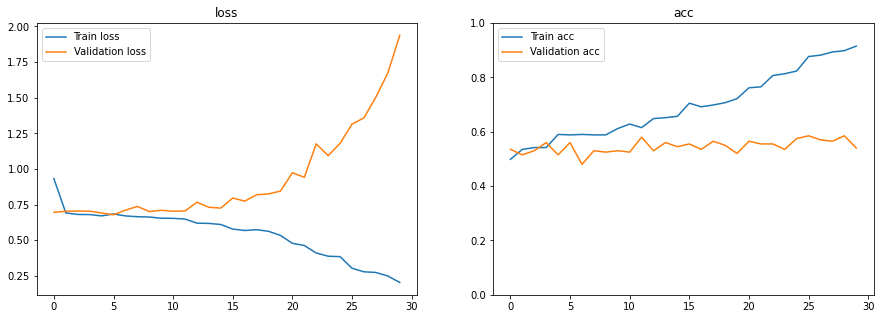

In [26]:
#evaluting the model
model1.evaluate(X_test,y_test)
show_final_history(history1)

In [27]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (10, 10), activation='relu', use_bias=True, input_shape=(300,97,1)))
model2.add(layers.MaxPooling2D((6, 6)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu', use_bias=True, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
model2.add(layers.Dense(2, use_bias=True))
model2.summary()

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fitting the model
history2 = model2.fit(X_train,y_train,epochs=30, validation_data=(X_val, y_val))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 291, 88, 32)       3232      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 46, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 6, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 21, 4, 64)         36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 5376)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

7/7 [==============================] - 0s 18ms/step - loss: 1.6902 - accuracy: 0.4350


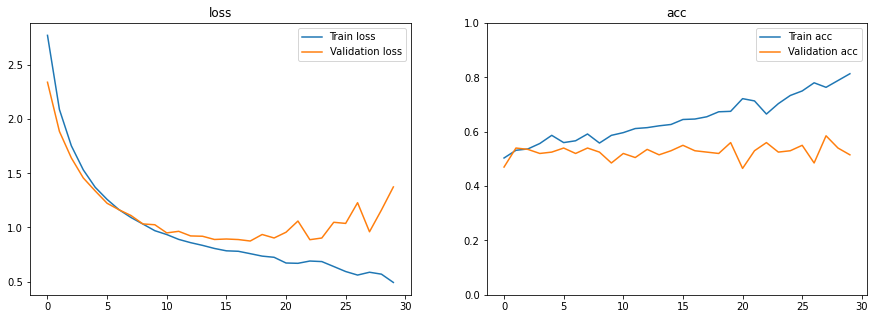

In [28]:
model2.evaluate(X_test,y_test)
show_final_history(history2)